In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df=pd.read_csv('Groceries.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [6]:
df.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.195455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.744289
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,2.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


<Axes: xlabel='class', ylabel='count'>

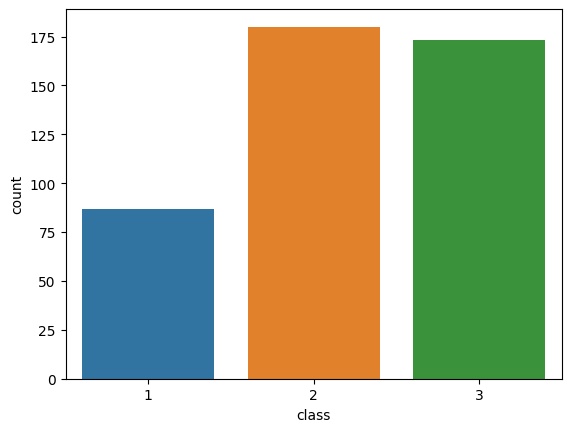

In [7]:
sns.countplot(x=df['class'])

In [8]:
X=df.drop('class',axis=1)
Y=df['class']

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [10]:
X=pca.fit_transform(X)
X.shape

(440, 2)

In [11]:
print(pca.explained_variance_ratio_)

[0.45961362 0.40517227]


In [12]:
df_pca=pd.DataFrame(X,columns=['f1','f2'])

In [13]:
df_pca['y']=Y

<Axes: xlabel='f1', ylabel='f2'>

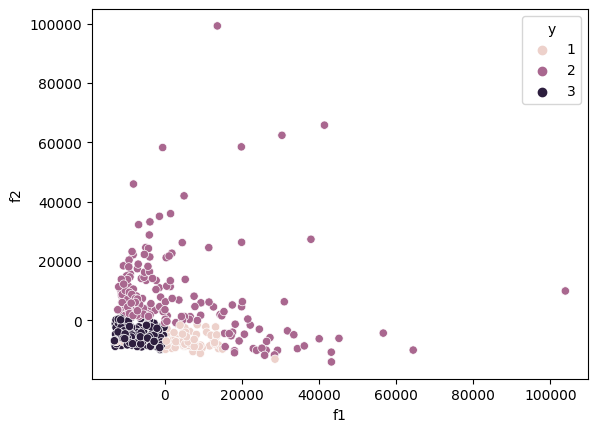

In [14]:
sns.scatterplot(x=df_pca['f1'],y=df_pca['f2'],hue=df_pca['y'])

In [15]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)


In [16]:
X_new=df.drop('class',axis=1)
X_new=tsne.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=['f1','f2'])

<Axes: xlabel='f1', ylabel='f2'>

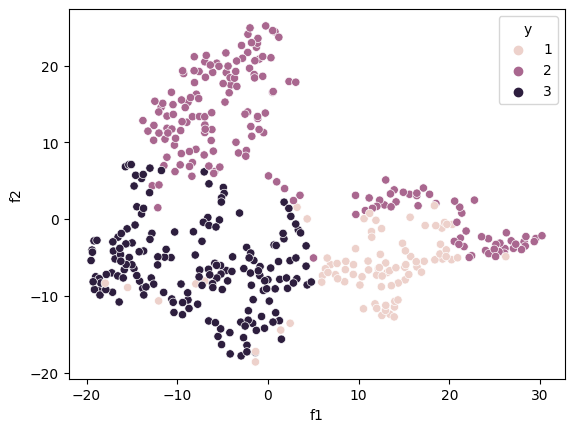

In [17]:
X_new['y']=Y
sns.scatterplot(x=X_new['f1'],y=X_new['f2'],hue=X_new['y'])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
scores=[]
for k in range(1,51):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  y_pred=knn.predict(X_test)
  scores.append(knn.score(X_test,Y_test))
  error.append(np.mean(y_pred!=Y_test))

<Figure size 640x480 with 0 Axes>

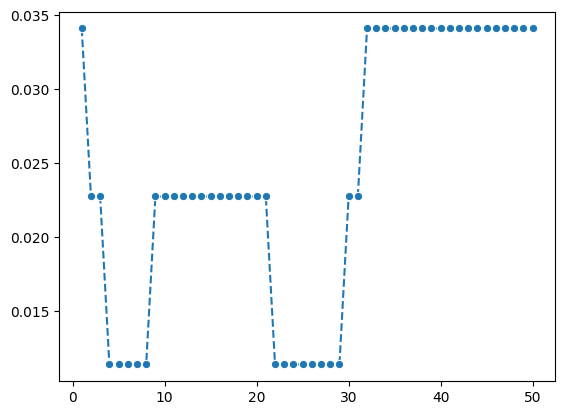

<Figure size 640x480 with 0 Axes>

In [20]:
from matplotlib import pyplot as plt
sns.lineplot(x=np.arange(1,51),y=error,linestyle='dashed',marker='o')
plt.figure()


<Figure size 640x480 with 0 Axes>

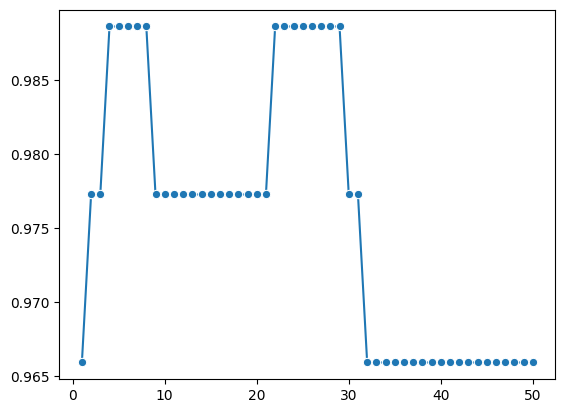

<Figure size 640x480 with 0 Axes>

In [25]:
sns.lineplot(x=np.arange(1,51),y=scores,marker='o')
plt.figure()


#KNN with k=4 neighbours can give test accuracy of 98.5%